RNN 

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN




#Se proporciona una serie de tiempo  y se devide el conjunto de datos de entrenamiento y prueba

**1 Paso preprocesamiento de datos basico**

In [98]:

# Definimos una serie temporal como un array de numpy.
time_series = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
print("time_series", time_series)

# Calculamos el tamaño del conjunto de entrenamiento como el 60% de la longitud total de la serie.
train_size = int(len(time_series) * 0.6) 

# Dividimos la serie temporal en conjuntos de entrenamiento y prueba.
train_data, test_data = time_series[:train_size], time_series[train_size:]
print("train_data: ",train_data)
print("test_data", test_data)

time_series [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
train_data:  [1 2 3 4 5 6 7 8 9]
test_data [10 11 12 13 14 15]


**Paso 2. Preparacion de datos **
transformar nnuestros datos en secuencias


In [99]:
def create_dataset(data, seq_length):
     # Inicializamos dos listas vacías para almacenar las secuencias y las etiquetas.
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)
    
#definimos el numero de pasois de tiempo para la serie temporal

seq_length = 4

#Creamos un conjuntop de entrenamiento y prueba en formato 3D

X_train, y_train = create_dataset(train_data, seq_length)
X_test, y_test = create_dataset(test_data, seq_length)

#imprimimios los conjuntos de datos en formato 3D
print("conjunto de secuencias de entrenamineto:\n", X_train)
print("Etiquetas de entrenamiento:\n", y_train)
print("conjunto de secuencia de pruebas:\n",X_test)
print("Etiquetas de prueba:\n", y_test)



conjunto de secuencias de entrenamineto:
 [[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]
 [5 6 7 8]]
Etiquetas de entrenamiento:
 [5 6 7 8 9]
conjunto de secuencia de pruebas:
 [[10 11 12 13]
 [11 12 13 14]]
Etiquetas de prueba:
 [14 15]


**paso 3. contstruccion del modelo**

Epoch 1/200


c:\Users\julig\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 55.6097
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 53.8523
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 52.1222
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 50.4202
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 48.7466
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 47.1018
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 45.4859
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 43.8994
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 42.3435
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 40.8206
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 39.3276
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 37.8646
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 36.4317
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 35.0276
Epoch 15/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 33.6485
Epoch 16/200
1/1 ━

<Axes: >

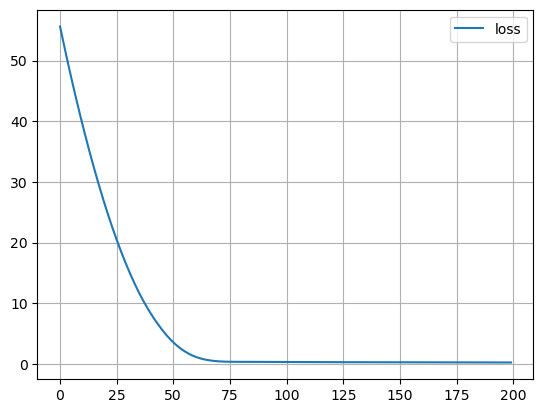

In [100]:


model = Sequential()
model.add(SimpleRNN(16, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))

#Paso 4 : Compiolacion del modelo
model.compile(optimizer='adam', loss='mse')

#Paso 5 entrenamineto del modelo
history = model.fit(X_train, y_train, epochs=200)


#Paso 6: Graficar el historial de entrenamiento:
pd.DataFrame(history.history).plot(grid=True)

In [101]:
#evaluacion del modelo

evaluacion = model.evaluate(X_test, y_test)
print(evaluacion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - loss: 5.1528
5.152767181396484


X_test: 
 [[10 11 12 13]
 [11 12 13 14]]
y_test: 
  [14 15]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
y_pred: 
 [[16.103853]
 [17.424734]]


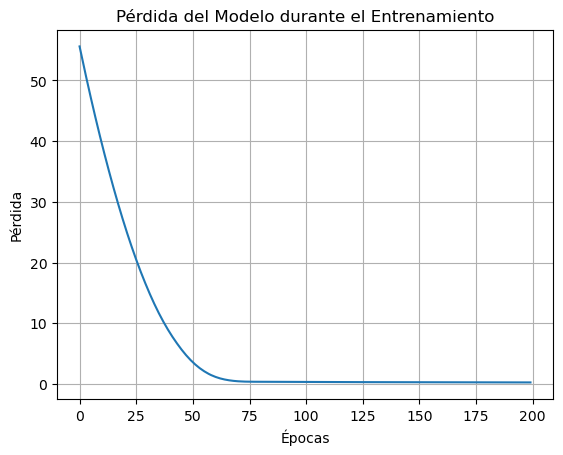

In [102]:
# prediccion

print("X_test: \n", X_test)
print("y_test: \n ",y_test)
y_pred = model.predict(X_test)
print("y_pred: \n", y_pred)



plt.plot(history.history['loss'])
plt.title('Pérdida del Modelo durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.grid(True)
plt.show()